In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from linear_classifier import TrainLinearClassifiersFS
from dataprep import read_pickle
from collections import defaultdict

In [2]:
results = defaultdict(dict)
for d in ['CIFAR10','STL10']:
    for m in ['simclr','simsiam','supervised']:
        results[d][m] = defaultdict(dict)
        for r in ['results_df_accs','confusion_matrix_summarized_dict','clf_report_df']:
            results[d][m][r] = None
            results[d][m][r] = read_pickle(f'results/{d}/{m}/{r}.pickle')

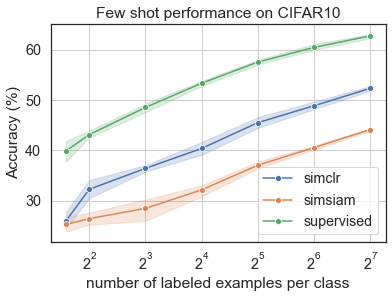

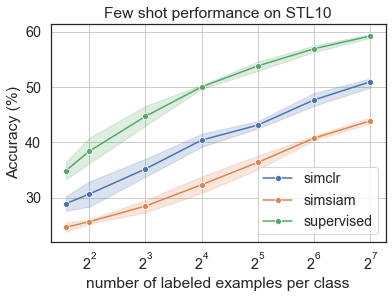

In [23]:
sns.set(font_scale=1.3)
sns.set_style('white')
for d in ['CIFAR10','STL10']:
    f, ax = plt.subplots()
    for m in ['simclr','simsiam','supervised']:
        sns.lineplot(x='num_labeled_sampled',y='acc',marker='o',data=results[d][m]['results_df_accs'],label=m)
    ax.set_xscale('log',base=2)
    ax.set(title = f'Few shot performance on {d}',xlabel = 'number of labeled examples per class',ylabel = 'Accuracy (%)')
    
    plt.grid()
    plt.savefig(f'Few shot performance on {d}.png',format='png',dpi=500,bbox_inches = 'tight',facecolor='white')
    plt.show()

In [4]:


clf_report_df = []
for d in ['CIFAR10','STL10']:
    for i,m in enumerate(['simclr','simsiam','supervised']):
        temp = results[d][m]['clf_report_df']
        temp['dataset'] = d
        temp['model'] = m
        clf_report_df.append(temp)
        
clf_report_df = pd.concat(clf_report_df)

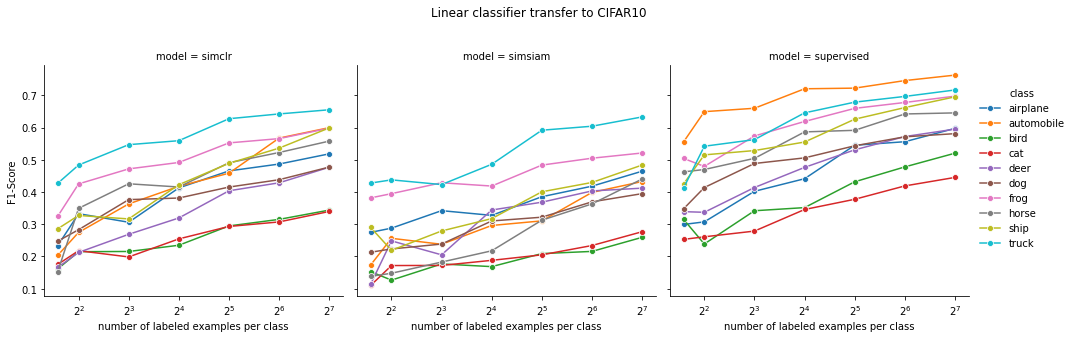

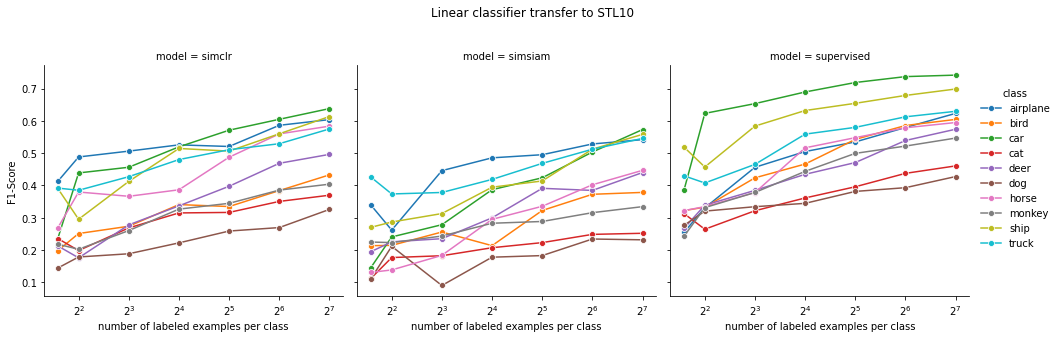

In [178]:
for d in ['CIFAR10','STL10']:
    g = sns.FacetGrid(clf_report_df[clf_report_df['dataset']==d],
                      col = 'model',
                      hue='class',
                      palette='tab10',
                      height = 4.5)

    g.map_dataframe(sns.lineplot,x='n',y='f1-score',marker='o',data=results[d][m]['clf_report_df'],ci=None)
    g.set(xlabel='number of labeled examples per class',ylabel='F1-Score')
    g.add_legend()
    plt.xscale('log',base=2)
    g.fig.subplots_adjust(top=0.8)
    g.fig.suptitle(f'Linear classifier transfer to {d}')
    plt.savefig(f'Linear classifier transfer to {d}.png',format='png',dpi=500,bbox_inches = 'tight',facecolor='white')
    plt.show()

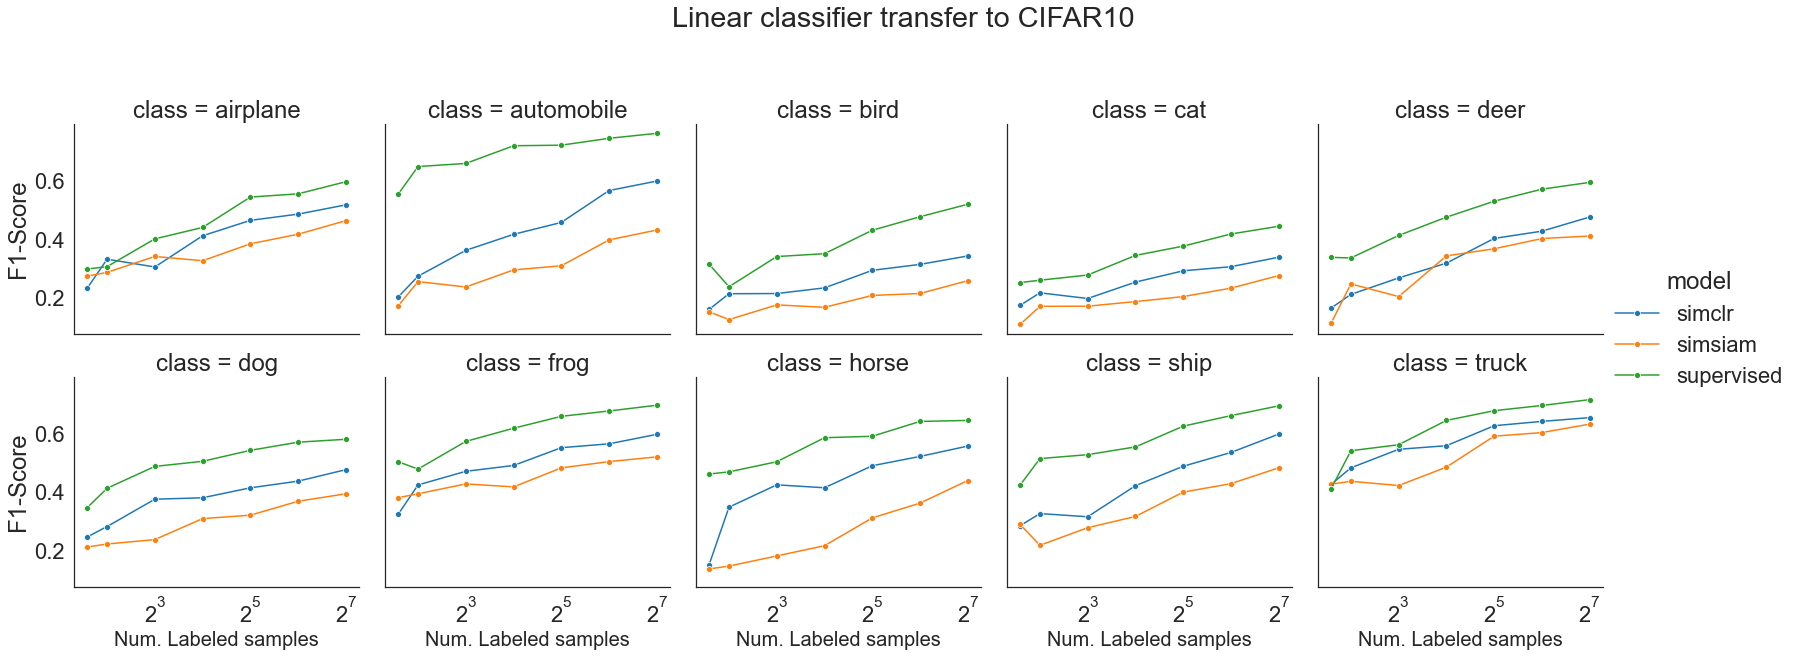

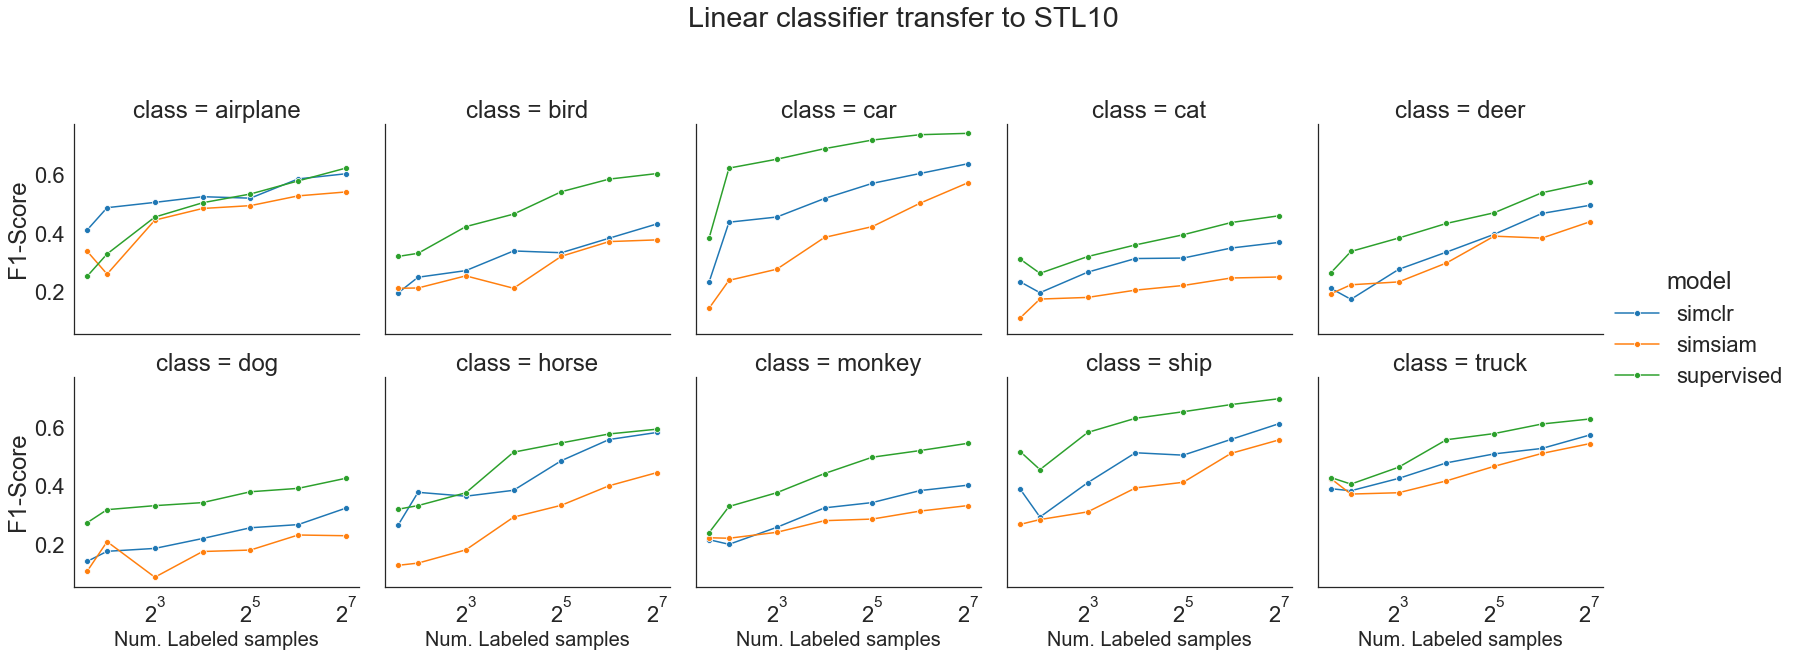

In [20]:
sns.set(font_scale=2)
sns.set_style('white')


for d in ['CIFAR10','STL10']:
    g = sns.FacetGrid(clf_report_df[clf_report_df['dataset']==d],
                      col = 'class',
                      hue='model',
                      palette='tab10',
                      height = 4.5,
                      col_wrap=5)

    g.map_dataframe(sns.lineplot,x='n',y='f1-score',marker='o',data=results[d][m]['clf_report_df'],ci=None)
    g.set(xlabel='',ylabel='F1-Score')
    g.add_legend()
    plt.xscale('log',base=2)
    g.fig.subplots_adjust(top=0.8)
    g.fig.suptitle(f'Linear classifier transfer to {d}')
    g.set_axis_labels('Num. Labeled samples',fontsize = 20)
    #g.set_titles(size = 20)
    plt.savefig(f'Linear classifier transfer to {d}.png',format='png',dpi=500,bbox_inches = 'tight',facecolor='white')
    plt.show()

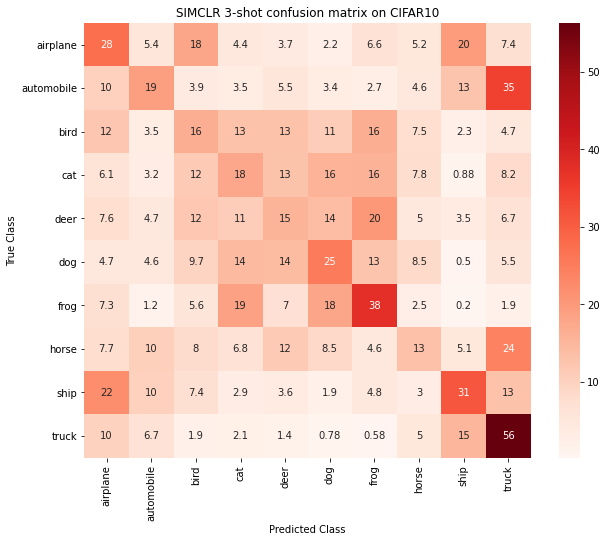

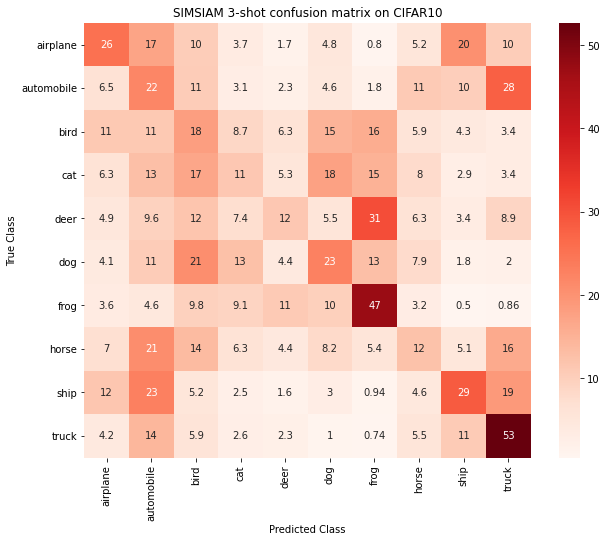

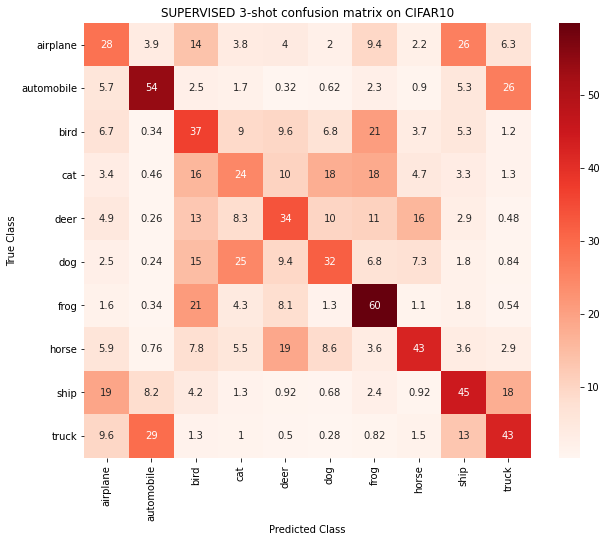

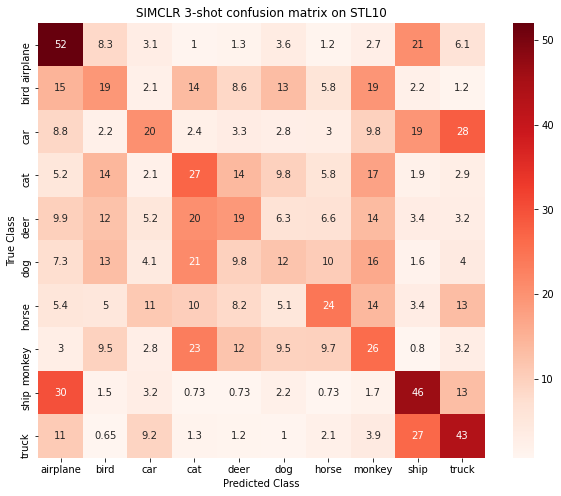

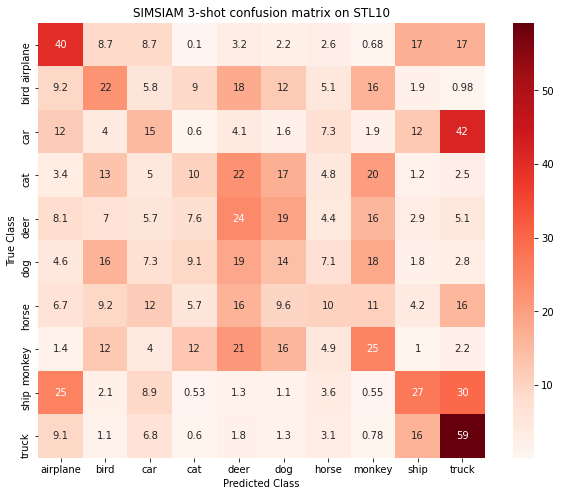

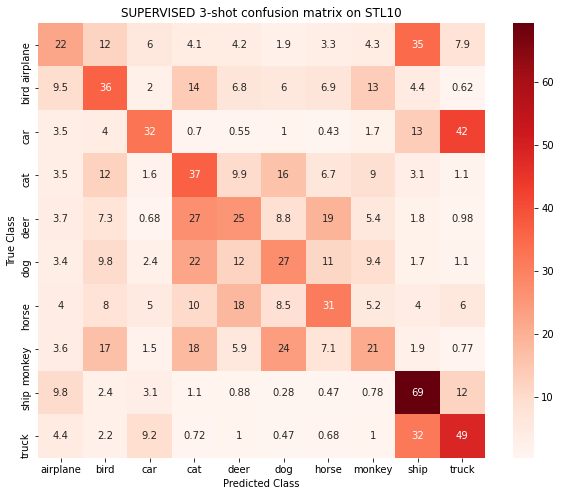

In [280]:
norm = 'rows'
n = 3
for d in ['CIFAR10','STL10']:
    for m in ['simclr','simsiam','supervised']:
        temp = results[d][m]['confusion_matrix_summarized_dict'][n]

        if norm == 'all':
            temp = temp*100/temp.sum().sum()
        elif norm == 'rows':
            temp = temp.div(temp.sum(axis=1),axis='rows')*100

        temp.columns = temp.columns.droplevel()
        temp = temp.droplevel(level=0)

        plt.figure(figsize = (10,8))
        ax = sns.heatmap(data = temp,cmap='Reds',annot=True)
        ax.set(ylabel = 'True Class',
               xlabel = 'Predicted Class',
               title = f"{m.upper()} {n}-shot confusion matrix on {d}")
        plt.show()

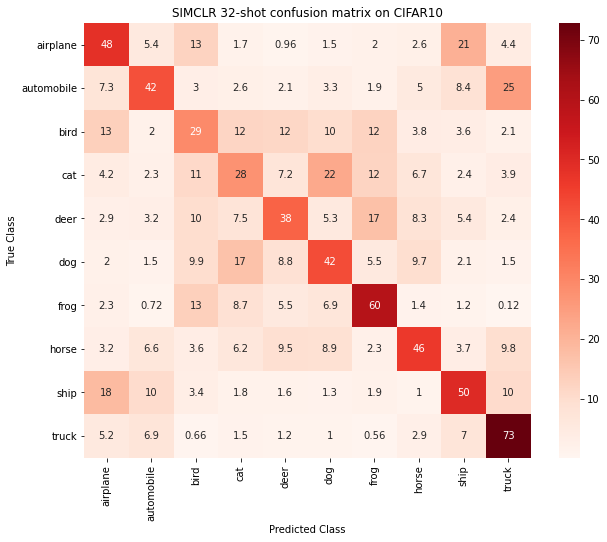

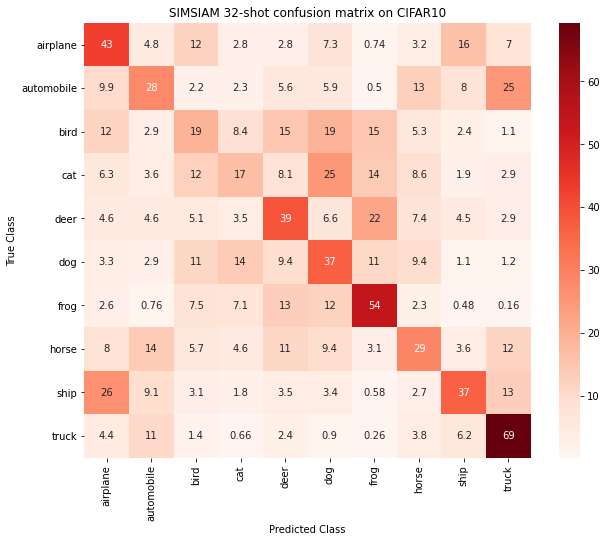

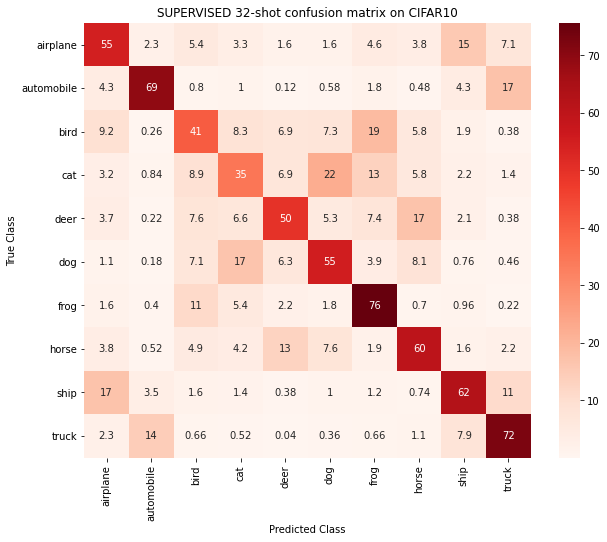

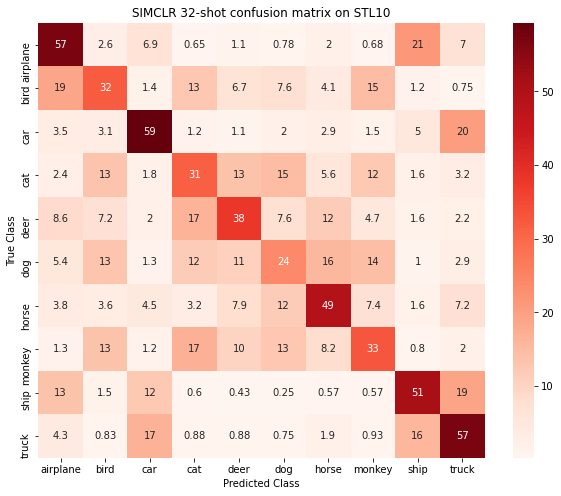

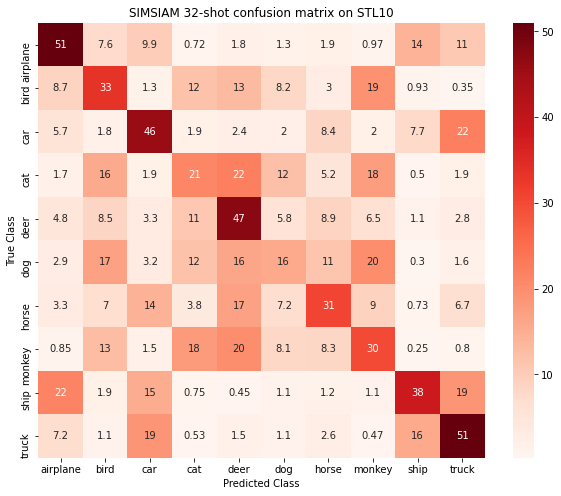

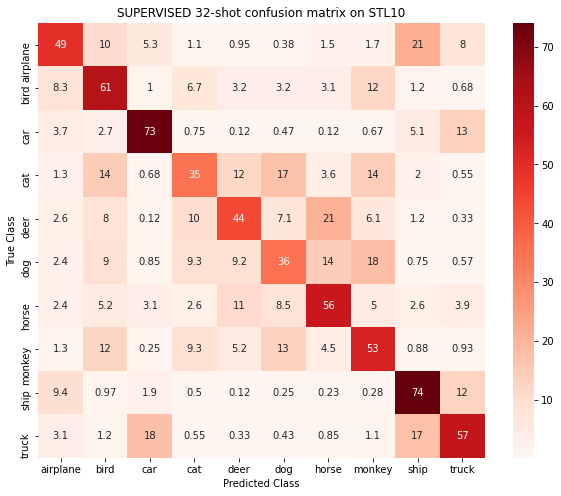

In [281]:
norm = 'rows'
n = 32
for d in ['CIFAR10','STL10']:
    for m in ['simclr','simsiam','supervised']:
        temp = results[d][m]['confusion_matrix_summarized_dict'][n]

        if norm == 'all':
            temp = temp*100/temp.sum().sum()
        elif norm == 'rows':
            temp = temp.div(temp.sum(axis=1),axis='rows')*100

        temp.columns = temp.columns.droplevel()
        temp = temp.droplevel(level=0)

        plt.figure(figsize = (10,8))
        ax = sns.heatmap(data = temp,cmap='Reds',annot=True)
        ax.set(ylabel = 'True Class',
               xlabel = 'Predicted Class',
               title = f"{m.upper()} {n}-shot confusion matrix on {d}")
        plt.show()

In [245]:
temp

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
airplane,2.756,0.544,1.784,0.442,0.374,0.218,0.664,0.516,1.964,0.738
automobile,1.018,1.914,0.390,0.348,0.546,0.340,0.272,0.460,1.258,3.454
bird,1.220,0.346,1.644,1.302,1.306,1.080,1.644,0.754,0.230,0.474
cat,0.614,0.318,1.160,1.758,1.290,1.570,1.596,0.784,0.088,0.822
deer,0.764,0.474,1.194,1.080,1.536,1.380,2.050,0.498,0.354,0.670
dog,0.468,0.460,0.972,1.438,1.410,2.532,1.266,0.852,0.050,0.552
frog,0.728,0.124,0.564,1.876,0.696,1.792,3.758,0.250,0.020,0.192
horse,0.772,1.048,0.798,0.676,1.150,0.854,0.460,1.326,0.514,2.402
ship,2.196,1.008,0.740,0.294,0.364,0.188,0.482,0.296,3.122,1.310
truck,1.002,0.672,0.186,0.210,0.144,0.078,0.058,0.504,1.512,5.634
